In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy.stats import norm
import seaborn as sns
from IPython.display import HTML
import matplotlib.animation as animation

In [6]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate time points
t = np.linspace(0, 14, 100)


# Define kernel function (squared exponential)
def kernel(x1, x2, l=2.0, sigma=1.0):
    sqdist = np.sum(x1**2, 1).reshape(-1, 1) + np.sum(x2**2, 1) - 2 * np.dot(x1, x2.T)
    return sigma**2 * np.exp(-0.5 / l**2 * sqdist)

In [7]:
# Generate sample paths
n_samples = 10
X = t.reshape(-1, 1)
mu = np.zeros(len(t))
K = kernel(X, X)
samples = np.random.multivariate_normal(mu, K, n_samples)

# Calculate mean and confidence intervals
mean = np.mean(samples, axis=0)
std = np.std(samples, axis=0)

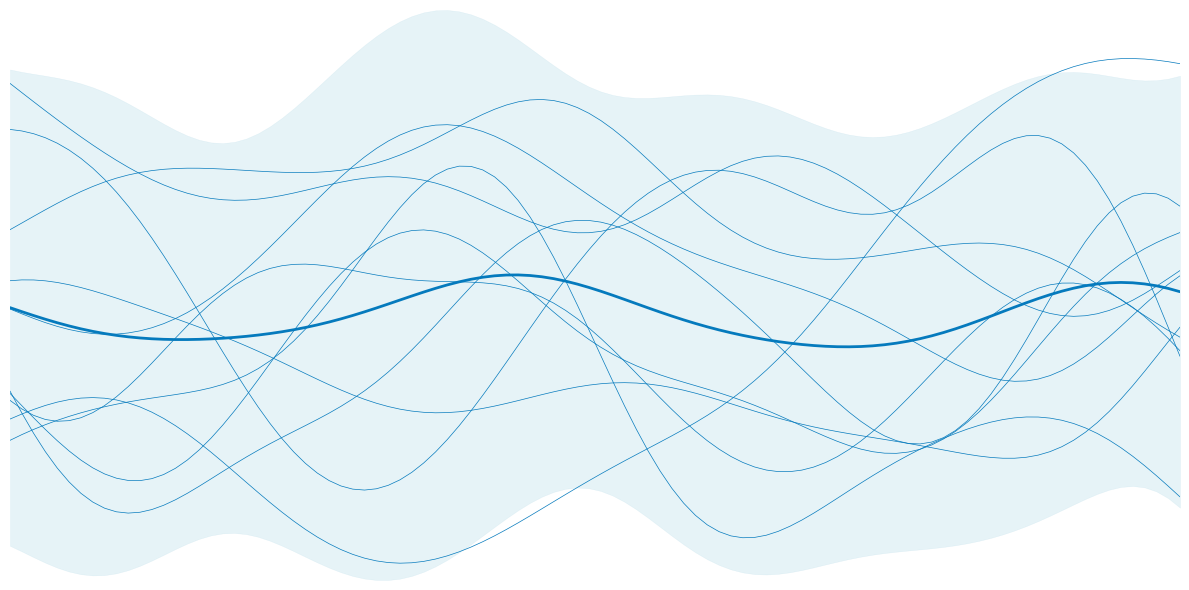

In [27]:
# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot sample paths
for i in range(n_samples):
    ax.plot(t, samples[i], alpha=1, color="#057ABD", linewidth=0.5)

# Plot mean line
ax.plot(t, mean, color="#057ABD", linewidth=2, label="Mean")

# Plot confidence intervals
ax.fill_between(
    t, mean - 2 * std, mean + 2 * std, color="lightblue", alpha=0.3, label="95% CI"
)

# Add some points along the mean line
selected_points = np.linspace(0, 14, 8)
selected_indices = [np.argmin(np.abs(t - point)) for point in selected_points]
# ax.scatter(t[selected_indices], mean[selected_indices], color="black", s=30, zorder=5)

# Customize the plot

ax.set_axis_off()


# Set style
sns.set_style("whitegrid")
ax.grid(False)

ax.margins(x=0, y=0)
fig.tight_layout()

# Show the plot
# plt.tight_layout()
# plt.show()

In [ ]:







# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 6))
plt.style.use("seaborn")
sns.set_style("whitegrid")

# Initialize empty lines
sample_lines = [
    ax.plot([], [], alpha=0.2, color="lightblue", linewidth=1)[0]
    for _ in range(n_samples)
]
(mean_line,) = ax.plot([], [], color="blue", linewidth=2, label="Mean")
conf_fill = ax.fill_between([], [], [], color="lightblue", alpha=0.3, label="95% CI")

# Set up the plot
ax.set_xlim(0, 14)
ax.set_xlabel("time")
ax.set_ylabel("y")
ax.grid(True, alpha=0.3)


# Animation function
def animate(frame):
    # Calculate current x position
    current_t = t[:frame]

    # Update sample lines
    for i, line in enumerate(sample_lines):
        line.set_data(current_t, samples[i, :frame])

    # Update mean line
    mean_line.set_data(current_t, mean[:frame])

    # Update confidence intervals
    # ax.collections.clear()  # Clear previous fill_between
    if len(current_t) > 0:
        ax.fill_between(
            current_t,
            mean[:frame] - 2 * std[:frame],
            mean[:frame] + 2 * std[:frame],
            color="lightblue",
            alpha=0.3,
        )

    # Add points along the mean line
    if frame > 0:
        selected_points = np.linspace(0, current_t[-1], min(8, frame))
        selected_indices = [
            np.argmin(np.abs(current_t - point)) for point in selected_points
        ]
        ax.scatter(
            current_t[selected_indices],
            mean[selected_indices],
            color="black",
            s=30,
            zorder=5,
        )

    return sample_lines + [mean_line]


# Create animation
anim = FuncAnimation(fig, animate, frames=len(t), interval=50, blit=True)

# Save the animation
anim.save("gaussian_process.gif", writer="pillow")

plt.close()